# Probing BERT model 

In [2]:
from transformers import BertModel, BertTokenizer

model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name, output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained(model_name)


# Preparing GoEmotion Dataset

In [3]:
import re
import pandas as pd 
import emoji
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import seaborn as sns
# from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import ast

In [4]:
GoEmotion_train= pd.read_csv('Go_Emotion_Google/go_emotions_train.csv')
GoEmotion_test = pd.read_csv('Go_Emotion_Google/go_emotions_test.csv')
GoEmotion_val = pd.read_csv('Go_Emotion_Google/go_emotions_validation.csv')

df_train = pd.DataFrame(GoEmotion_train)
df_test = pd.DataFrame(GoEmotion_test)
df_validation = pd.DataFrame(GoEmotion_val)

In [5]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)
df_validation.drop_duplicates(inplace=True)


In [6]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove unwanted punctuations
    
    # Handle specific punctuations and emoticons
    emoticon_dict = {
        ":)": "happy",
        ":))": "happy",
        ":-)": "happy",
        ":-))": "happy",
        ":(": "sad",
        ":((": "sad",
        ":-((": "sad",
        ":-((": "sad",
        ":/": "confusion", 
        "://": "confusion", 
        ":-/": "confusion",
        ":-//": "confusion",
        ":\\": "confusion",
        ":-\\": "confusion",
        ":|": "neutral",
        ":-|": "neutral",
        "XD": "laugh",
        ":D": "laugh",
        ":-D": "laugh"
    }
    
    # Replace emoticons with words
    for emoticon, replacement in emoticon_dict.items():
        text = text.replace(emoticon, replacement)
    
    # Handle emojis
    text = emoji.demojize(text)
    
    # Remove non-alphanumeric characters except spaces (next line removes unnecessary spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def string_to_list(label):
    """
    Convert string representation of an array into a list of integers.
    Handles cases where input is already a list.
    
    Args:
    label: String or list representation of an array, e.g., '[6 7]' or [6, 7].
    
    Returns:
    list: A list of integers.
    """
    if isinstance(label, list):  # If it's already a list, return it as is
        return label
    elif isinstance(label, str):  # If it's a string, convert it
        return [int(x) for x in label.strip('[]').replace(',', '').split()]
    else:  # If it's neither, raise an error or handle as needed
        raise ValueError(f"Unexpected label format: {label}")



In [7]:
df_train['cleaned_text'] = df_train['text'].apply(preprocess_text)
df_test['cleaned_text'] = df_test['text'].apply(preprocess_text)
df_validation['cleaned_text'] = df_validation['text'].apply(preprocess_text)


df_train['labels'] = list(df_train['labels'].apply(string_to_list))
df_test['labels'] = list(df_test['labels'].apply(string_to_list))
df_validation['labels'] = list(df_validation['labels'].apply(string_to_list))

isinstance(df_train['labels'][0], list)

True

In [8]:
inputs = tokenizer("I feel so happy!", return_tensors="pt", truncation=True, padding=True)
outputs = model(**inputs)
hidden_states = outputs.hidden_states  # Tuple of (layer_0, layer_1, ..., layer_n)
hidden_states

(tensor([[[ 1.6855e-01, -2.8577e-01, -3.2613e-01,  ..., -2.7571e-02,
            3.8253e-02,  1.6400e-01],
          [-3.4026e-04,  5.3974e-01, -2.8805e-01,  ...,  7.5731e-01,
            8.9008e-01,  1.6575e-01],
          [-1.0880e-02,  2.4388e-01,  4.0120e-01,  ...,  5.2067e-01,
            7.6206e-01,  2.9935e-01],
          ...,
          [-3.6098e-01,  1.5021e-01,  3.2847e-01,  ...,  5.9706e-01,
            9.8247e-02, -5.7576e-01],
          [ 6.8306e-01, -5.7511e-01, -6.0698e-01,  ...,  4.1866e-01,
            8.3560e-01,  4.7626e-01],
          [-1.4815e-01, -2.9485e-01, -1.6900e-01,  ..., -5.0090e-01,
            2.5442e-01, -7.0021e-02]]], grad_fn=<NativeLayerNormBackward0>),
 tensor([[[ 9.6683e-02,  6.5844e-02, -6.9296e-02,  ...,  7.3462e-02,
            1.1153e-01,  1.5583e-03],
          [ 5.3564e-01,  1.2203e+00, -1.2127e-01,  ...,  7.0966e-01,
            1.0613e+00,  6.3357e-02],
          [-9.8095e-02,  1.3155e+00,  1.2244e+00,  ...,  5.6262e-01,
            1.1525e+0

In [9]:
# Import necessary libraries
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import torch
import numpy as np





# Step 1: Load and Preprocess Data
# The dataset is already loaded and preprocessed in df_train, df_test, and df_validation
# Splitting data into text (X) and labels (y)


for i in df_train['labels']:
    if isinstance(i, list):
        if len(i) in {1,2,3,4,5}:
            pass
        else :
            print(i, " Is not a list")
    else :
        print(i, " Is not a list")
X_train = df_train['cleaned_text'].tolist()
y_train = df_train['labels']  # Convert string labels to list

for i in df_test['labels']:
    if isinstance(i, list):
        if len(i) in {1,2,3,4,5}:
            pass
        else :
            print(i, " Is not a list")
    else :
        print(i, " Is not a list")
X_test = df_test['cleaned_text'].tolist()
y_test = df_test['labels']  # Convert string labels to list


X_train = X_train[:25000]
y_train = y_train[:25000]
X_test = X_test[:2500]
y_test = y_test[:2500]

In [10]:

# BERT tokenizer preparation
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset
def tokenize_dataset(texts):
    inputs = tokenizer(
        texts,
        padding=True,
        truncation=True,
        return_tensors="pt",
        max_length=512
    )
    return inputs


In [11]:

# Tokenizing train and test sets
train_inputs = tokenize_dataset(X_train)
test_inputs = tokenize_dataset(X_test)


In [12]:

# Convert labels to tensors
def convert_labels_to_tensors(labels, num_classes):
    label_tensors = torch.zeros((len(labels), num_classes))
    for i, label_list in enumerate(labels):
        for label in label_list:
            label_tensors[i, label] = 1  # Multilabel binarization
    return label_tensors


In [13]:

# Check if labels are lists already and avoid unnecessary parsing
if all(isinstance(label, list) for label in df_train['labels']):
    flattened_labels = [label for sublist in df_train['labels'] for label in sublist]
else:
    flattened_labels = df_train['labels'].apply(ast.literal_eval).explode()

num_classes = max(flattened_labels) + 1  # Get the number of unique labels

In [14]:

y_train_tensors = convert_labels_to_tensors(y_train, num_classes)
y_test_tensors = convert_labels_to_tensors(y_test, num_classes)

In [15]:

# Step 2: Load BERT Model and Extract Representations
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)
model.eval()  # Set model to evaluation mode

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [16]:

# Extract CLS token representations from each layer
def extract_cls_representations(inputs, model):
    with torch.no_grad():
        outputs = model(**inputs)
        hidden_states = outputs.hidden_states  # Hidden states for each layer
        cls_representations = [layer[:, 0, :] for layer in hidden_states]  # CLS token for each layer
    return cls_representations


In [17]:

# Extract train and test CLS representations
train_cls_representations = extract_cls_representations(train_inputs, model)
test_cls_representations = extract_cls_representations(test_inputs, model)


In [ ]:


# Step 3: Train Classifier Probes for Each Layer
probes = []
results = []
rs = []

In [ ]:
for layer_idx, layer_train_representations in enumerate(train_cls_representations):
    # Convert training data to NumPy
    X_train_layer = layer_train_representations.numpy()
    y_train_layer = y_train_tensors.numpy().argmax(axis=1)  # Convert to class indices

    # Train Logistic Regression Classifier
    probe = LogisticRegression(max_iter=100, multi_class="ovr")
    probe.fit(X_train_layer, y_train_layer)
    probes.append(probe)

    # Evaluate on test data
    X_test_layer = test_cls_representations[layer_idx].numpy()
    y_test_layer = y_test_tensors.numpy().argmax(axis=1)  # Convert to class indices
    predictions = probe.predict(X_test_layer)
    
    # Define emotion labels
    emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire',
                'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
                'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

    # Calculate performance metrics
    report = classification_report(
        y_test_layer,
        predictions,
        labels=np.arange(28),  # Ensure all classes 0-27 are included
        target_names=emotions,
        zero_division=0,  # Avoid errors for missing classes
        output_dict=True  # Return the report as a dictionary
    )
    accuracy = report['accuracy']  # Extract accuracy
    results.append((layer_idx, accuracy))  # Store layer index and accuracy
    print(f"Layer {layer_idx} Classification Report:")
    print(report)
    rs.append(report)


/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Layer 0 Classification Report:
{'admiration': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16.0}, 'amusement': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10.0}, 'anger': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'annoyance': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16.0}, 'approval': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'caring': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disapproval': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 12.0}, 'disgust': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4.0

/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Layer 1 Classification Report:
{'admiration': {'precision': 0.2, 'recall': 0.3125, 'f1-score': 0.24390243902439024, 'support': 16.0}, 'amusement': {'precision': 0.14285714285714285, 'recall': 0.1, 'f1-score': 0.11764705882352941, 'support': 10.0}, 'anger': {'precision': 0.6666666666666666, 'recall': 0.3333333333333333, 'f1-score': 0.4444444444444444, 'support': 6.0}, 'annoyance': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16.0}, 'approval': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'caring': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disapproval': {'precision': 1.0, 'recall': 0.08333333333333333,

/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Layer 2 Classification Report:
{'admiration': {'precision': 0.3, 'recall': 0.5625, 'f1-score': 0.391304347826087, 'support': 16.0}, 'amusement': {'precision': 0.1111111111111111, 'recall': 0.1, 'f1-score': 0.10526315789473684, 'support': 10.0}, 'anger': {'precision': 0.6666666666666666, 'recall': 0.3333333333333333, 'f1-score': 0.4444444444444444, 'support': 6.0}, 'annoyance': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16.0}, 'approval': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'caring': {'precision': 1.0, 'recall': 0.125, 'f1-score': 0.2222222222222222, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disapproval': {'precision': 1.0, 'recall': 0.1666

/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: Futu

Layer 3 Classification Report:
{'admiration': {'precision': 0.2777777777777778, 'recall': 0.625, 'f1-score': 0.38461538461538464, 'support': 16.0}, 'amusement': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10.0}, 'anger': {'precision': 0.25, 'recall': 0.16666666666666666, 'f1-score': 0.2, 'support': 6.0}, 'annoyance': {'precision': 1.0, 'recall': 0.0625, 'f1-score': 0.11764705882352941, 'support': 16.0}, 'approval': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'caring': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disapproval': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 12.0}, 'disgus

/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Layer 5 Classification Report:
{'admiration': {'precision': 0.2903225806451613, 'recall': 0.5625, 'f1-score': 0.3829787234042553, 'support': 16.0}, 'amusement': {'precision': 0.6363636363636364, 'recall': 0.7, 'f1-score': 0.6666666666666666, 'support': 10.0}, 'anger': {'precision': 0.25, 'recall': 0.16666666666666666, 'f1-score': 0.2, 'support': 6.0}, 'annoyance': {'precision': 0.6666666666666666, 'recall': 0.125, 'f1-score': 0.21052631578947367, 'support': 16.0}, 'approval': {'precision': 0.25, 'recall': 0.125, 'f1-score': 0.16666666666666666, 'support': 8.0}, 'caring': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.2, 'recall': 0.14285714285714285, 'f1-score': 0.16666666666666666, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'precision': 0.25, 'recall': 0.3333333333333333, 'f1-score': 0.

/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Layer 6 Classification Report:
{'admiration': {'precision': 0.23333333333333334, 'recall': 0.4375, 'f1-score': 0.30434782608695654, 'support': 16.0}, 'amusement': {'precision': 0.4666666666666667, 'recall': 0.7, 'f1-score': 0.56, 'support': 10.0}, 'anger': {'precision': 0.25, 'recall': 0.16666666666666666, 'f1-score': 0.2, 'support': 6.0}, 'annoyance': {'precision': 0.125, 'recall': 0.0625, 'f1-score': 0.08333333333333333, 'support': 16.0}, 'approval': {'precision': 0.14285714285714285, 'recall': 0.125, 'f1-score': 0.13333333333333333, 'support': 8.0}, 'caring': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.2857142857142857, 'recall': 0.2857142857142857, 'f1-score': 0.2857142857142857, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support'

/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Layer 7 Classification Report:
{'admiration': {'precision': 0.34615384615384615, 'recall': 0.5625, 'f1-score': 0.42857142857142855, 'support': 16.0}, 'amusement': {'precision': 0.5833333333333334, 'recall': 0.7, 'f1-score': 0.6363636363636364, 'support': 10.0}, 'anger': {'precision': 0.16666666666666666, 'recall': 0.16666666666666666, 'f1-score': 0.16666666666666666, 'support': 6.0}, 'annoyance': {'precision': 0.18181818181818182, 'recall': 0.125, 'f1-score': 0.14814814814814814, 'support': 16.0}, 'approval': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'caring': {'precision': 0.2857142857142857, 'recall': 0.25, 'f1-score': 0.26666666666666666, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.3333333333333333, 'recall': 0.2857142857142857, 'f1-score': 0.3076923076923077, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'pr

/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Layer 8 Classification Report:
{'admiration': {'precision': 0.36363636363636365, 'recall': 0.5, 'f1-score': 0.42105263157894735, 'support': 16.0}, 'amusement': {'precision': 0.5, 'recall': 0.7, 'f1-score': 0.5833333333333334, 'support': 10.0}, 'anger': {'precision': 0.25, 'recall': 0.16666666666666666, 'f1-score': 0.2, 'support': 6.0}, 'annoyance': {'precision': 0.16666666666666666, 'recall': 0.125, 'f1-score': 0.14285714285714285, 'support': 16.0}, 'approval': {'precision': 0.08333333333333333, 'recall': 0.125, 'f1-score': 0.1, 'support': 8.0}, 'caring': {'precision': 0.3333333333333333, 'recall': 0.25, 'f1-score': 0.2857142857142857, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.16666666666666666, 'recall': 0.2857142857142857, 'f1-score': 0.21052631578947367, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'precision': 0.0, 'recall': 0.0, 

/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Layer 9 Classification Report:
{'admiration': {'precision': 0.26666666666666666, 'recall': 0.5, 'f1-score': 0.34782608695652173, 'support': 16.0}, 'amusement': {'precision': 0.5833333333333334, 'recall': 0.7, 'f1-score': 0.6363636363636364, 'support': 10.0}, 'anger': {'precision': 0.3333333333333333, 'recall': 0.3333333333333333, 'f1-score': 0.3333333333333333, 'support': 6.0}, 'annoyance': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16.0}, 'approval': {'precision': 0.1111111111111111, 'recall': 0.25, 'f1-score': 0.15384615384615385, 'support': 8.0}, 'caring': {'precision': 0.5, 'recall': 0.25, 'f1-score': 0.3333333333333333, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.3333333333333333, 'recall': 0.2857142857142857, 'f1-score': 0.3076923076923077, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'precision': 0.0, 'recall':

/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Layer 10 Classification Report:
{'admiration': {'precision': 0.3333333333333333, 'recall': 0.625, 'f1-score': 0.43478260869565216, 'support': 16.0}, 'amusement': {'precision': 0.5, 'recall': 0.7, 'f1-score': 0.5833333333333334, 'support': 10.0}, 'anger': {'precision': 0.5, 'recall': 0.3333333333333333, 'f1-score': 0.4, 'support': 6.0}, 'annoyance': {'precision': 0.2222222222222222, 'recall': 0.125, 'f1-score': 0.16, 'support': 16.0}, 'approval': {'precision': 0.2, 'recall': 0.375, 'f1-score': 0.2608695652173913, 'support': 8.0}, 'caring': {'precision': 0.5, 'recall': 0.25, 'f1-score': 0.3333333333333333, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.375, 'recall': 0.42857142857142855, 'f1-score': 0.4, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disapproval': {'precision'

/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Layer 11 Classification Report:
{'admiration': {'precision': 0.20689655172413793, 'recall': 0.375, 'f1-score': 0.26666666666666666, 'support': 16.0}, 'amusement': {'precision': 0.5384615384615384, 'recall': 0.7, 'f1-score': 0.6086956521739131, 'support': 10.0}, 'anger': {'precision': 0.42857142857142855, 'recall': 0.5, 'f1-score': 0.46153846153846156, 'support': 6.0}, 'annoyance': {'precision': 0.09090909090909091, 'recall': 0.0625, 'f1-score': 0.07407407407407407, 'support': 16.0}, 'approval': {'precision': 0.0625, 'recall': 0.125, 'f1-score': 0.08333333333333333, 'support': 8.0}, 'caring': {'precision': 0.4, 'recall': 0.25, 'f1-score': 0.3076923076923077, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.2, 'recall': 0.14285714285714285, 'f1-score': 0.16666666666666666, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'precision': 0.0, 'recall'

/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/amirali/Desktop/Final-Year-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Layer 12 Classification Report:
{'admiration': {'precision': 0.20689655172413793, 'recall': 0.375, 'f1-score': 0.26666666666666666, 'support': 16.0}, 'amusement': {'precision': 0.42857142857142855, 'recall': 0.6, 'f1-score': 0.5, 'support': 10.0}, 'anger': {'precision': 0.6666666666666666, 'recall': 0.3333333333333333, 'f1-score': 0.4444444444444444, 'support': 6.0}, 'annoyance': {'precision': 0.18181818181818182, 'recall': 0.125, 'f1-score': 0.14814814814814814, 'support': 16.0}, 'approval': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0}, 'caring': {'precision': 0.6666666666666666, 'recall': 0.25, 'f1-score': 0.36363636363636365, 'support': 8.0}, 'confusion': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0}, 'curiosity': {'precision': 0.3333333333333333, 'recall': 0.2857142857142857, 'f1-score': 0.3076923076923077, 'support': 7.0}, 'desire': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'disappointment': {'precision': 0.0, 'r

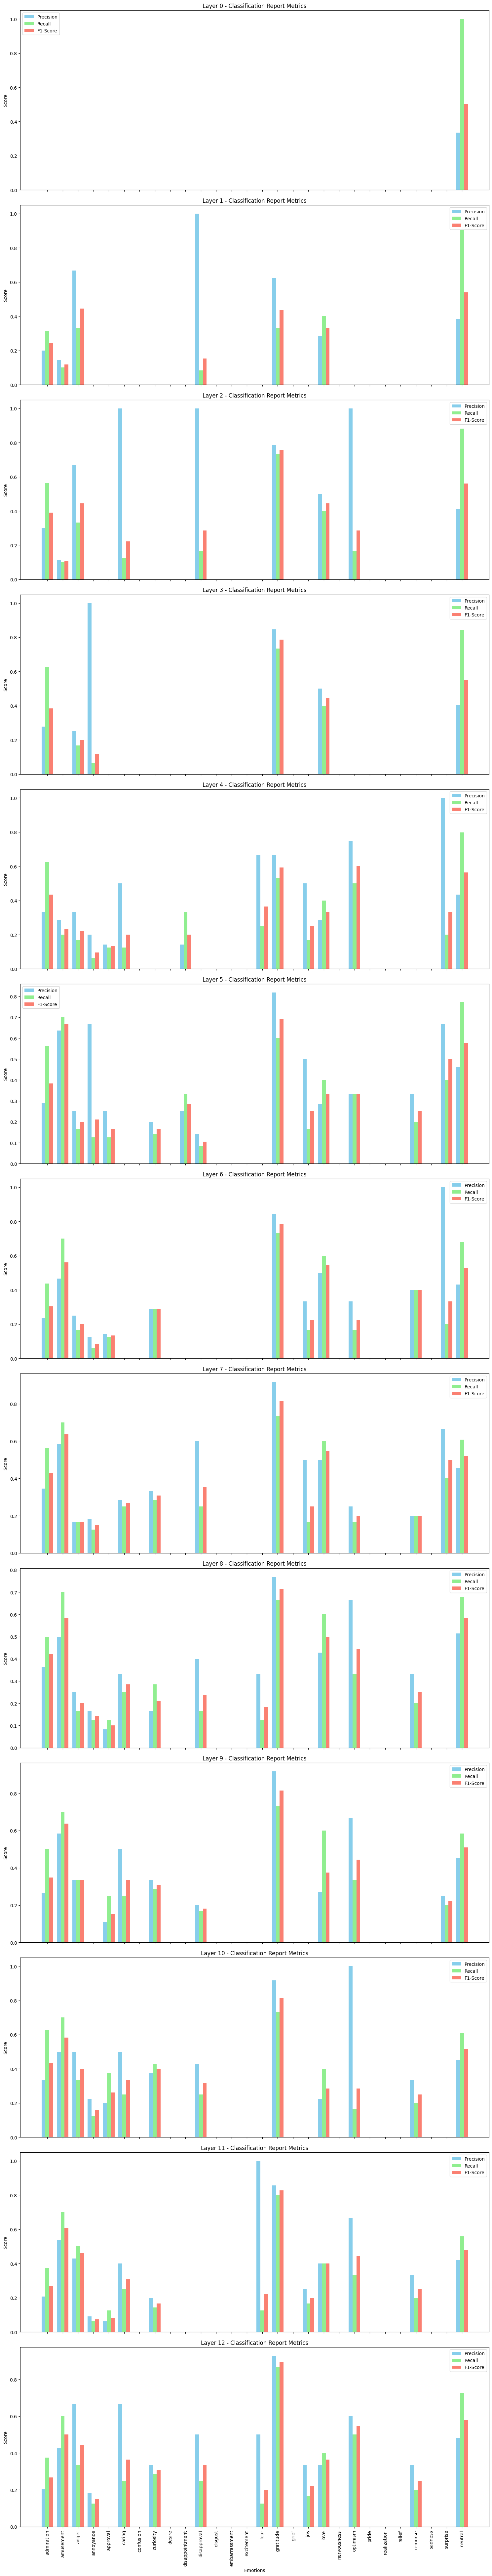

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_layers = len(rs)  # Number of layers
num_emotions = len(emotions)  # Number of emotions
width = 0.25  # Width of the bars

fig, axes = plt.subplots(num_layers, 1, figsize=(15, 6 * num_layers), sharex=True)

if num_layers == 1:
    axes = [axes]  # Ensure axes is always iterable for a single layer

for layer_idx, report in enumerate(rs):
    precision_scores = [report[emotion]['precision'] for emotion in emotions]
    recall_scores = [report[emotion]['recall'] for emotion in emotions]
    f1_scores = [report[emotion]['f1-score'] for emotion in emotions]

    ax = axes[layer_idx]
    x = np.arange(num_emotions)

    ax.bar(x - width, precision_scores, width, label='Precision', color='skyblue')
    ax.bar(x, recall_scores, width, label='Recall', color='lightgreen')
    ax.bar(x + width, f1_scores, width, label='F1-Score', color='salmon')

    ax.set_xticks(x)
    ax.set_xticklabels(emotions, rotation=90)
    ax.set_ylabel("Score")
    ax.set_title(f"Layer {layer_idx} - Classification Report Metrics")
    ax.legend()

plt.xlabel("Emotions")
plt.tight_layout()
plt.show()


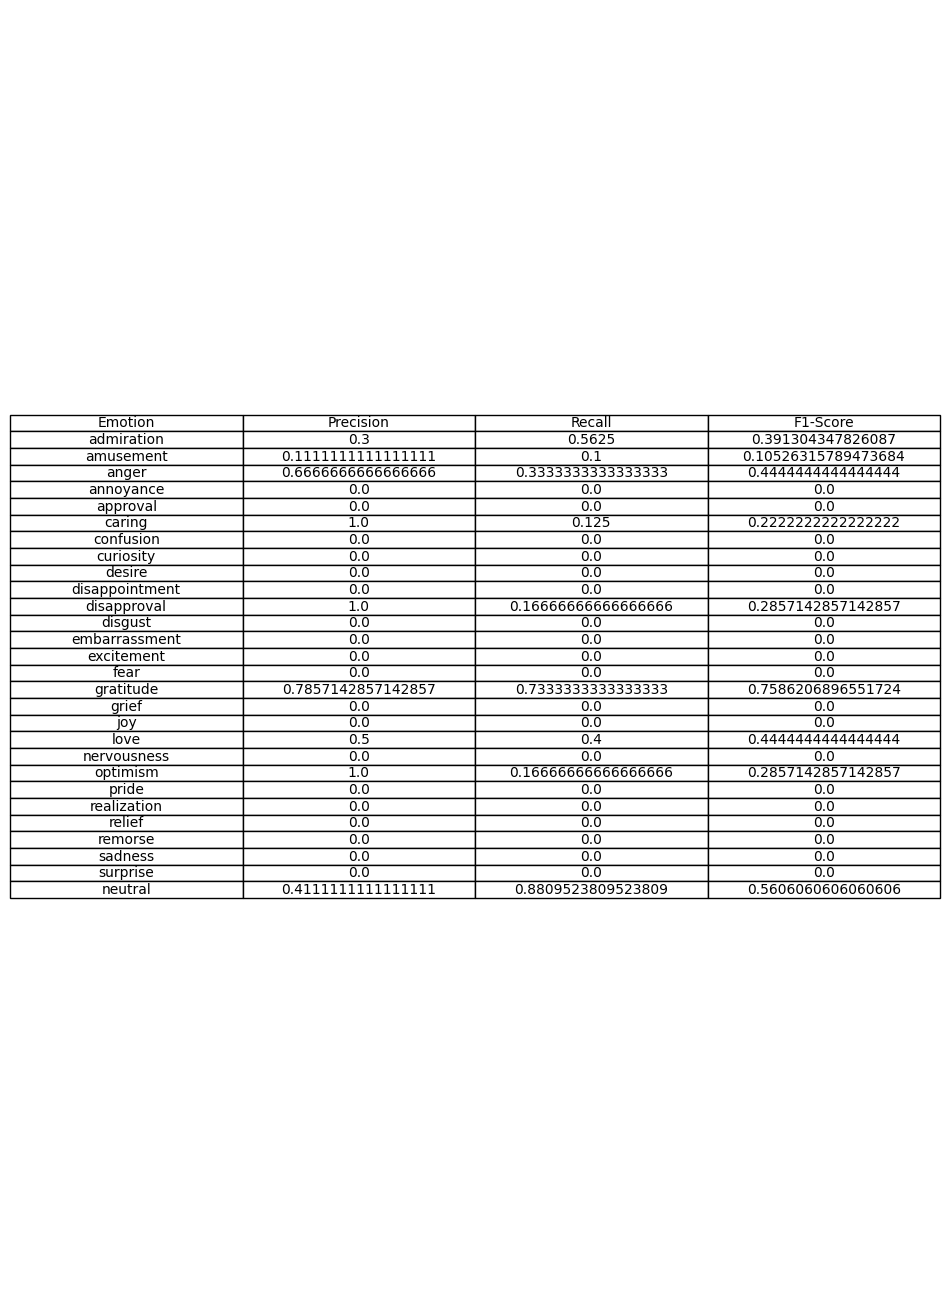

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Assume `rs` contains the classification reports for each layer
# Each `report` in `rs` should be a dictionary with metrics for all emotions

# Select the layer index to display (for demonstration, using the first layer)
layer_idx = 2
report = rs[layer_idx]  # Replace with the specific layer you want to display

# Create a DataFrame for the metrics
emotion_metrics = []
for emotion in emotions:
    emotion_metrics.append([
        emotion,
        report[emotion]['precision'],
        report[emotion]['recall'],
        report[emotion]['f1-score']
    ])

# Create a pandas DataFrame
df = pd.DataFrame(emotion_metrics, columns=["Emotion", "Precision", "Recall", "F1-Score"])

# Plot the table
fig, ax = plt.subplots(figsize=(12, len(emotions) * 0.6))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

plt.show()


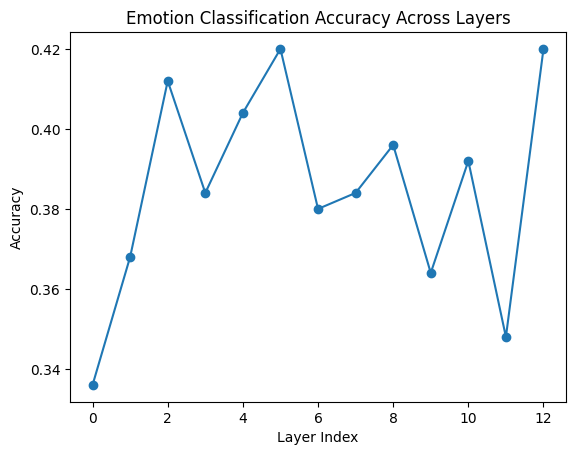

In [ ]:

import matplotlib.pyplot as plt



# Step 4: Visualize Results Across Layers
layer_indices = [result[0] for result in results]
accuracies = [result[1] for result in results]

plt.plot(layer_indices, accuracies, marker='o')
plt.xlabel("Layer Index")
plt.ylabel("Accuracy")
plt.title("Emotion Classification Accuracy Across Layers")
plt.show()
